In [323]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np

In [324]:
train = pd.read_csv('fish_train.csv')
test = pd.read_csv('fish_reserved.csv')
fish = pd.read_csv('fish.csv')
#train = train[train['Weight'] < 1500]

In [313]:
test = pd.merge(test, fish, on=['Species', 'Width', 'Length1', 'Length2', 'Length3', 'Height'], how='left')

In [314]:
#train = fish

In [325]:
pca = PCA(svd_solver='full', n_components=3)
pca.fit(train[['Length1', 'Length2', 'Length3']])
pca.explained_variance_ratio_

array([9.96276165e-01, 3.61728778e-03, 1.06547638e-04])

In [326]:
#train['Lengths'] = pca.transform(train[['Length1', 'Length2', 'Length3']])[:, 0]
train['Height'] = train['Height'] ** 3
train['Width'] = train['Width'] ** 3
#train['Lengths'] = train['Lengths'] ** 3
train['Length1'] = train['Length1'] ** 3
train['Length2'] = train['Length2'] ** 3
train['Length3'] = train['Length3'] ** 3
#train = pd.get_dummies(train, columns=['Species'], drop_first=True)

In [327]:
#test['Lengths'] = pca.transform(test[['Length1', 'Length2', 'Length3']])[:, 0]
test['Height'] = test['Height'] ** 3
test['Width'] = test['Width'] ** 3
#test['Lengths'] = test['Lengths'] ** 3
test['Length1'] = test['Length1'] ** 3
test['Length2'] = test['Length2'] ** 3
test['Length3'] = test['Length3'] ** 3
#test = pd.get_dummies(test, columns=['Species'], drop_first=True)

In [329]:
model = LinearRegression()
model.fit(train.drop(['Species', 'Weight'], axis = 1), train['Weight'])
pred = model.predict(test.drop(['Species'], axis = 1))

In [330]:
pred

array([ 116.13958959,  121.09100633,   85.05844589,  110.53741817,
         86.26816447,  158.37190267,   60.38379001,  536.00402273,
        395.87203138,  123.78191529, 1827.47451205,  158.49720347,
        627.26572214, 1085.86942862,   35.8288348 ,  606.29580347,
        133.25451084,  807.75274166, 1398.16595075,   85.30337754,
        591.8721016 ,  196.54465434,   81.7781292 ,  156.43159457,
        350.58923309,  590.54188771,  277.05633793,   26.21268469,
         37.39281599,   21.54240282, 1001.17770307,  477.89521046,
        542.29161919,  151.53091357,   26.07114895,   87.52795656,
        122.12694929,  932.88325856,  744.70163842,  130.42604977])

In [319]:
#[ 115.09542494,  167.16936251,  119.53362955,  119.9735435 ,
#         85.49662161,  198.10125498,   67.21469221,  432.06103752,
#        382.21135428,  126.02863666, 2105.91829436,  188.76392423,
#        602.91775337, 1039.48785615,    5.13384353,  581.26275142,
#        126.2033317 ,  813.30100446, 1461.82673204,  120.76127183,
#        564.71154429,  193.46121624,  115.65108458,  196.23823088,
#        354.49066243,  598.87357866,  371.02830916,   26.12026373,
#         85.38774392,  -16.79036008,  938.68254721,  511.76523087,
#        533.47816064,  172.31096385,   38.30231952,   78.6394041 ,
#        165.8725462 ,  942.16843229,  751.45974073,  173.97427872]
#Ваш результат: 0.958215603161

In [320]:
#[ 101.19839177,  134.35806691,  103.0235124 ,  126.52227403,
#        106.83358623,  145.23585144,   97.00394625,  350.35038216,
#        380.77446747,  146.92647051, 1735.9685074 ,  120.64867477,
#        627.00069902, 1111.9606387 ,   90.5217966 ,  592.18448441,
#         96.22405717,  828.99319057, 1248.72371546,   87.15464035,
#        563.63988448,  196.08652686,  112.72959097,  143.69779752,
#        223.44885334,  641.82758956,  283.94935588,   77.41061833,
#         49.71429436,  106.08042347,  967.37062009,  520.11716898,
#        536.81005146,  175.30442529,   58.42412983,   82.64437284,
#        118.78293628, 1000.77176904,  770.88321756,  125.05325475]
#Ваш результат: 0.965019798784

In [331]:
#[ 116.13958959,  121.09100633,   85.05844589,  110.53741817,
#         86.26816447,  158.37190267,   60.38379001,  536.00402273,
#        395.87203138,  123.78191529, 1827.47451205,  158.49720347,
#        627.26572214, 1085.86942862,   35.8288348 ,  606.29580347,
#        133.25451084,  807.75274166, 1398.16595075, 1398.16595075,
#         85.30337754,  591.8721016 ,  196.54465434,   81.7781292 ,
#        156.43159457,  350.58923309,  590.54188771,  277.05633793,
#         26.21268469,   37.39281599,   21.54240282, 1001.17770307,
#        477.89521046,  542.29161919,  151.53091357,   26.07114895,
#         87.52795656,  122.12694929,  932.88325856,  744.70163842,
#        130.42604977]
#0.9833495717929298

[ 116.13958959,  121.09100633,   85.05844589,  110.53741817,
         86.26816447,  158.37190267,   60.38379001,  536.00402273,
        395.87203138,  123.78191529, 1827.47451205,  158.49720347,
        627.26572214, 1085.86942862,   35.8288348 ,  606.29580347,
        133.25451084,  807.75274166, 1398.16595075,   85.30337754,
        591.8721016 ,  196.54465434,   81.7781292 ,  156.43159457,
        350.58923309,  590.54188771,  277.05633793,   26.21268469,
         37.39281599,   21.54240282, 1001.17770307,  477.89521046,
        542.29161919,  151.53091357,   26.07114895,   87.52795656,
        122.12694929,  932.88325856,  744.70163842,  130.42604977]

In [332]:
r2_score(test['Weight'], pred)

KeyError: 'Weight'

<Axes: >

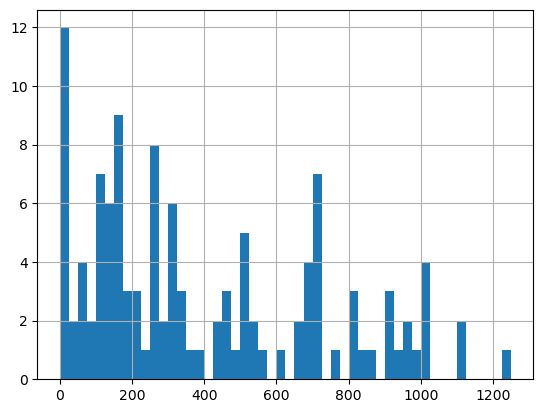

In [268]:
(train['Weight']).hist(bins=50)

In [223]:
pred = test['Weight'] + np.random.normal(0, 60, test.shape[0])

In [224]:
list(pred)

[63.66189462678411,
 105.22020793546164,
 -51.20917267093708,
 167.58046669528332,
 120.0347812608741,
 225.24308153764676,
 -3.227105980870604,
 545.2864016010848,
 361.71385211016616,
 224.39927335576613,
 1667.7616250594685,
 126.8655555227725,
 554.5926165290265,
 1018.0784940064519,
 -50.75403976944412,
 575.8773182460469,
 135.7042482026459,
 807.3650854095179,
 1539.2982741889293,
 1655.3704781309204,
 83.77340720113602,
 657.6125543219105,
 253.38160236040585,
 117.26324569830231,
 73.19289717412587,
 342.7593348655507,
 529.1148418443203,
 368.7696644943643,
 56.82747052599845,
 -69.43595528937058,
 33.92512831445576,
 979.8247529691932,
 552.8824272266776,
 634.6713290445533,
 168.63873110140753,
 7.443491996361025,
 140.34407348051505,
 268.10380576746365,
 1042.7012088814663,
 757.0763646918145,
 61.129334991551715]

In [269]:
test['pred'] = pred
test['error'] = abs(test['pred'] - test['Weight'])

In [270]:
test.sort_values('error')

,Species,Length1,Length2,Length3,Height,Width,Weight,Lengths,pred,error
8,Bream,27.6,30.0,35.0,2033.901163,103.161709,390.0,54.817638,397.496797,7.496797
27,Whitefish,25.6,28.0,30.8,676.373727,102.608399,306.0,-1.070292,315.595942,9.595942
14,Perch,12.5,13.7,14.7,43.912254,7.990404,32.0,-18026.754435,19.376073,12.623927
5,Perch,22.0,24.0,25.5,387.898983,51.603494,225.0,-620.768669,208.500722,16.499278
35,Smelt,12.1,13.0,13.8,11.805628,1.980439,12.2,-20557.812704,-6.497276,18.697276
31,Bream,38.0,41.0,46.5,5473.643252,258.535723,950.0,11861.303820,929.832335,20.167665
11,Perch,23.0,25.0,26.5,267.027778,49.978362,180.0,-314.661194,200.224862,20.224862
29,Smelt,13.8,15.0,16.2,25.210460,6.636193,19.9,-13564.450109,40.230858,20.330858
32,Bream,26.8,29.7,34.5,2850.905034,147.072535,500.0,24.107221,520.415006,20.415006
39,Bream,31.8,35.0,40.9,4378.747456,221.796695,725.0,1987.760365,748.721184,23.721184
